# Week 7 Overview
This week, we will cover the Law of Large Numbers and central limit theorem, two of the most famous results in probability theory. The Law of Large Numbers states that a sample average eventually converges to the true population under certain assumptions. The central limit theorem then shows that the distribution of sample averages will converge to a Gaussian (normal) distribution. Together, those results motivate the use of big data for analysis and enable the second topic this week, hypothesis testing.This allows us to flag data unlikely to have occurred under our default assumptions and potentially indicates something new and interesting.

### At the end of this week, you should be able to:
Interpret mathematical statements using limit notation
- State the law of large numbers
- State the central limit theorem
- Explain the central limit theorem colloquially and explain its limits
- Define hypothesis testing
- Explain the function of a p-value
- Explain any needed changes when checking many hypotheses 

## Central Limit Theorem

We will now cover the central limit theorem, one of the most famous results in probability theory. We will start with a brief introduction to limit notation, which we will use to reason about the behavior of measures as samples increase without bound. Then we will cover the law of large numbers, which shows that sample averages, particularly the sample mean, will converge in the limit to the true average as more samples are collected. The central limit theorem then describes the distribution of those sample averages around the true average and shows that distribution converges to a Gaussian distribution in the limit. This explains why Gaussian distributions are common enough to be dubbed "normal" and is the fundamental reason why we tend to make more accurate estimates from more data under the right conditions. We will also cover limitations and related abuses of the central limit theorem.

### Learning Objectives
- Interpret mathematical statements using limit notation.
- State the law of large numbers
- State the central limit theorem
- Explain the central limit theorem colloquially and explain its limits
#### Think About It
- Why is it normal for everything to look like a bell curve? 

## 7.1 Lesson: Limit Notation
Both the law of large numbers and the central limit theorem describe the behavior of sample measures as sample sizes increase without bound. To state them formally, we will use limit notation, which we will describe now. You will not be expected to derive new limits, but you should be able to read and understand mathematical statements using limits.

### Reading Limit Notation
The basic form of a limit expression is

$$ \lim_{{x \to p}} f(x) = L $$

Such an expression is read as "the limit is as $x$ approaches $p$ of $f(X)$ is $L$". LImit expressions are generally used when a mathematical expression cannot be naturally evaluated for a particular value. 

For example, consider the following function:
$$ f(x) = \frac {(x + 1)(x-1)}{x-1} $$

For most values of $x,f(x)$ can be simplified to $x+1$ by canceling out the $x-1$ terms in the numerator and denominator. Howeve,r this does not work for $x=1$, which results in zero divided by zero.
$$ f(1) = \frac{2*0}{0} $$

$$ = \frac{0}{0} $$

It is tempting to say "But they cancel out!" and that clearly $f(1) = 2$. Limits give us a more principled way to handle this situation. Instead of saying that $f(1) = 2$ and hand waving the divide by zero, we can instead say that the limit of $f(x)$ as $x$ approaches one is two.

$$ \lim_{{x \to p}} f(x) = 2 $$

Before technically defining limits, consider the following way to describe a limit and argue against it. Intuitively, the limit description sounds like the function output must get closer and closer to its limit as input value gets closer and closer to its limit.

How would we say that the claimed limit is wrong? By picking a threshold and claiming that the function output never gets within the threshold, or it reaches the threshold but does not stay within it.

### Definition: Finite Limit

For finite $p$, the meaning of 

$$ \lim_{{x \to p}} f(x) = L $$

is

$ (\forall \varepsilon > 0) \ (\exists \delta > 0) \ (0 < |x - p| < \delta \Rightarrow |f(x) - L| \leq \varepsilon ) $

Let's decode that step by step.

1. $ (\forall \varepsilon > 0) $ : Pick any positive $ \varepsilon $ that you want. We will look at sufficient conditions for $ f(x) $ to always be within $ \varepsilon $ of the limit $ L $.

2. $ (\exists \delta > 0) $ : We will always be able to find a $ \delta $ radius around input value $ p $ such that $ f(x) $ will always be within $ \varepsilon $ of the limit $ L $.

3. $ (0 < |x - p| < \delta) $ : This is the formal description of the $ \delta $ radius around input value $ p $. Note that $ x = p $ is excluded to avoid whatever reason we cannot evaluate $ f(p) $.

4. $ (|f(x) - L| \leq \varepsilon) $ : The desired result that $ f(x) $ is within $ \varepsilon $ of $ L $.

All together, the whole expression means that for any positive $ \varepsilon $, no matter how small, there is a $ \delta $ radius around $ p $ where $ f(x) $ is always within $ \varepsilon $ of the limit $ L $.

If there were an $ \varepsilon $ where this was not true, then that $ \varepsilon $ would be a counterexample to the intuition of $ f(x) $ getting closer to $ L $ as $ x $ got closer to $ p $.

For the law of large numbers and the Central Limit Theorem, we will be reasoning about the behavior of a measure as the sample size $ n $ grows without bound. So the limits that they consider will have the following form.

$ \lim_{{n \to \infty}} f(n) = y $

In that case, $ p $ is not finite, so the limit is defined differently. Instead, the following interpretation is used.

$ (\forall \varepsilon > 0) \ (\exists n_{\varepsilon} > 0) \ (n_{\varepsilon} \leq n \Rightarrow |f(n) - L| \leq \varepsilon) $

This interpretation is slightly simpler than the finite $ p $ case. Instead of asserting the existence of a $ \delta $ radius around $ p $ for each $ \varepsilon $, there is a minimum $ n_{\varepsilon} $ threshold such that $ f(n) $ is always within $ \varepsilon $ of $ L $ when $ n \geq n_{\varepsilon} $.

So, for a given $ \varepsilon $, $ f(n) $ will always be close enough to $ L $ for big enough $ n $.

## 7.2  Lesson: The Law of Large Numbers
The law of large numbers was first stated about five hundred years ago, and rigorously proven in 1713, that sample statistics become more accurate with more data. Given an unbounded number of independent samples, the average of a sample will become indistinguishable from the true average. The law of large numbers is rarely covered outside of statistics classes. Knowledge of the law of large numbers has crept into pop culture but is often misinterpreted, leading to the gambler's fallacy that we will describe shortly. We will look at what the law of large numbers actually says now.

### On the Importance of Independence
The initial and most common versions of the law of large numbers and the central limit theorem both assume that the random variables being averaged are independent from each other. If samples are not independent, then their averages may be systematically closer or farther from their true averages, which will change the convergence behavior.

For example, recall the formula for adding two variables from a multivariate normal distribution last week.

$$ Var(X+Y) = Var(X) + Var(Y) = 2p\sqrt{Var(X)Var(Y)} $$

If the variables $X$ and $Y$ come from the same distribution, then this simplifies to 

$$ Var(X+Y) = 2(1+p) Var(X) $$

and the variance of their average is 

$$ \text{Var}\left(\frac{X + Y}{2}\right) = \frac{1}{4} \text{Var}(X + Y) $$

$$ = \frac{1 + \rho}{2} \text{Var}(X) $$

if the correlation of $p$ is 1, then averaging $X$ and $Y$ does not decrease the variance since $\frac{1+1}{2} = 1$. Indeed, in that case, $X=Y$ so $\frac{X+Y}{2} = X$, and the average process is not doing anything. And if the correlation $p$ is very close to 1, then it will drop very slowly. 

On the otherhand, if the correlation $p$ is $-1$, then the correlation of their average will be zero. That is beacuse all the variation exactly cancels out. Or if the correlation $p$ is close to -1, it will still decrease sgnificantly.

The correlation 1 example can be generalized in many ways. For example, consider the scenario where the entire sequence of samples is the same, and only the first had any randomness. Before picking that first sample, it is known that they all have the same distribution, but since they are all the same, the cumulative average always matches the original sample. Whatever the initial distribution was, that distribution will be preserved no matter how many samples were chosen. This is absolutely a contrived case, but it highlights how the lack of independence breaks the process analyzed by the law of large numbers and the central limit theorem that follows.

### Formal Statements of the Law of Large Numbers
There are two closely related formulations of the law of large numbers. We will first give an informal statement of the law of large numbers ignoring the statistical subtleties and then move on to the two more formal versions. The first one is easier to explain, while the second is technically harder and is considered stronger because it implies the first. You should be able to understand both versions after the last few weeks of probability.

### Informal Statement: The Law of Large Numbers
If $X_1,X_2,\dots$ are independent with $E(X_1) = \mu$, and $\mu$ is finite, and

$$ \overline{X}_n = \frac{1}{n} \sum_{i=1}^{n} X_i $$

then loosely speaking,

$$ \lim_{{n \to \infty}} \overline{X}_n = \mu $$

The second sequence, $\overline{X}_1$, $\overline{X}_2,\dots$ is the cumulative means of $X_1,X_2,\dots,$ and the various versions of the law of large numbers say that these cumulative means will probabilistically converge to their true mean $\mu$. The informal statement above lacks any consideration of probabilities and does not address the chance of long-term deviations from the true mean.

In these statements, we are describing the behavior of the sequence $\overline{X}_n$ instead of some function $f(n)$, but the sequence vs. function difference is not important as far as limits are concerned.

**Theorem: The Weak Law of Large Numbers**

If $X_1, X_2, \dots$ are independent and identically distributed with $E(X_i) = \mu$, and $\mu$ is finite, then for any $\varepsilon > 0$,

$$ \lim_{{n \to \infty}} P\left( 1/n \sum_{i=1}^{n} X_i - \mu| \leq \varepsilon \right) = 1 $$

The weak law sounds a little similar to the limit definition above due to the similar use of an $\varepsilon$ threshold. You can interpret the weak law as follows. For any given threshold, the probability of $\overline{X}_n$ being within $\varepsilon$ of the true mean $\mu$ approaches 100% certainty as the number of samples grows.

The weakness here is that for any $\varepsilon$, and any very large but finite $n$, there is a small but non-zero probability of $\overline{X}_n$ being off by more than $\varepsilon$, assuming that is possible if each $X_i$ is the maximum or minimum value. That probability is vanishingly small for large $n$, but that possibility is why the weak law is complicated with probabilities compared to the informal statement.

The technical requirement of this formulation is that the $X_i$ variables be independent and identically distributed (often abbreviated as i.i.d.). The independence requirement is the same as we discussed last week; knowledge of any $X_i$ does not change the distribution of the others. This independence requirement avoids pathological scenarios where a skewed sample is deliberately picked, e.g., always picking $X_i < \mu$. Identically distributed means that all the $X_i$ variables have the same distribution beforehand. The identically distributed requirement simplified the original proof but was loosened in later versions of the weak law of large numbers.

**Theorem: The Strong Law of Large Numbers**

If $X_1, X_2, \dots$ are independent and identically distributed with $E(X_i) = \mu$, and $\mu$ is finite,

$$ P\left(\lim_{{n \to \infty}} \overline{X}_n = \mu \right) = 1 $$

The strong law of large numbers tackles the random nature of the $\overline{X}_n$ sequence directly and treats the limit as a random variable. By showing that limit variable is $\mu$ with probability one, it states that any $X_n$ sequence will eventually converge to $\mu$ with certainty. Unfortunately, that convergence is only guaranteed with unbounded samples.

There are some cases where the weak law of large numbers applies but the strong law of large numbers does not. These are unlikely to be relevant in data science.

All versions of the law of large numbers are practically lacking in that they do not bound the number of samples needed. In practice, this depends on the distribution of $X_i$, but the central limit theorem that we will cover next partially addresses this omission.

**Bernoulli Estimation Revisited**

At the beginning of this course, we simulated coin flips and shopping visits and observed their cumulative averages slowly but noisily approaching their expectations. We also observed the quantiles of those simulations more smoothly, but still slowly, approaching the expectations. At the time, we lacked a reason for this behavior. Now we have it, the law of large numbers. The law of large numbers explains why fixed percentiles converge to the expectation. And if you pick a given level of error, say predictions more than 0.6 when 0.5 is expected, then higher and higher quantiles will fall below that error with more samples.

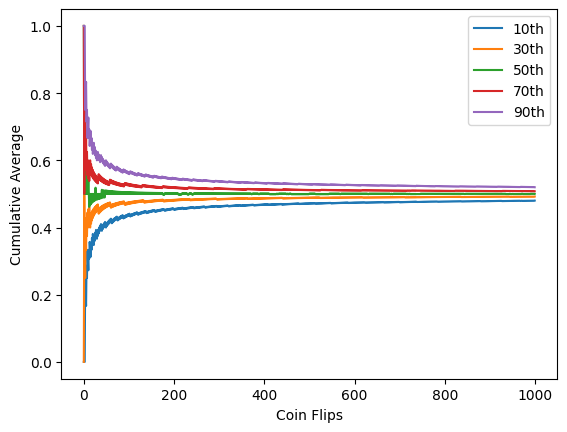

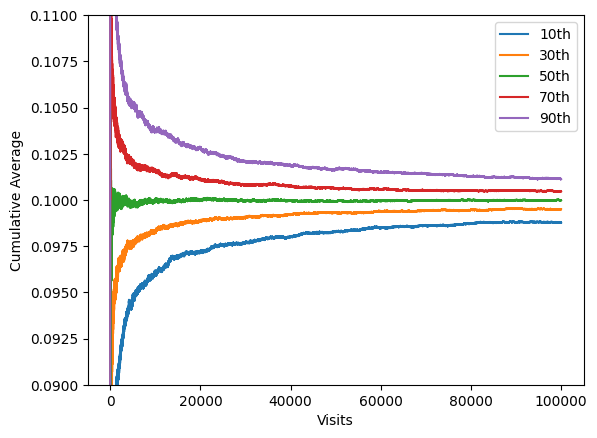

### The Law of Large Numbers and Gambling
A popular misconception of the law of large numbers is the belief that streaks of bad luck must have matching streaks of good luck to even them out. The most famous example was from the Monte Carlo Casino in 1913 when one roulette table had 26 consecutive balls land on black. After the first dozen or so balls on black, a large crowd was convinced that red was now much more likely to happen. Indeed, they thought that the table would be biased toward red for a while to counteract the long streak of balls landing on black. The casino made a lot of money from gamblers betting more than usual until the 27th ball finally landed on red.

What was wrong with the gamblers' reasoning? The law of large numbers said that the cumulative average will converge to the true probability over unbounded time scales. The gamblers misinterpreted the law as saying that the cumulative average would match the true probability over a finite time scale. More specifically, they assumed that the cumulative average would definitely match the true probability within the time they were present and gambling.

Consider the following table with a scenario starting from the same 26 balls on black. Each row after the first doubles the total number of spins to show the dynamics as the number of spins grows very large. To simplify this scenario, the balls will be assumed to land on black or red with 50% probability for each, so the casino advantage will be left out. The results of the spins will be exactly 50% black, so this table will track the correct expected number of balls landing on black.

In [6]:
import pandas as pd

# Data for the DataFrame
data = {
    "Incremental Spins": [26, 26, 52, 104, 208, 416],
    "Total Spins": [26, 52, 104, 208, 416, 832],
    "Incremental Black": [26, 13, 26, 52, 104, 208],
    "Total Black": [26, 39, 65, 117, 221, 429],
    "Cumulative Black Rate": [1.00, 0.75, 0.625, 0.5625, 0.53125, 0.515625],
    "Excess Black Rate": ["1/2", "1/4", "1/8", "1/16", "1/32", "1/64"],
    "Excess Black Spins": [13, 13, 13, 13, 13, 13]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Incremental Spins,Total Spins,Incremental Black,Total Black,Cumulative Black Rate,Excess Black Rate,Excess Black Spins
0,26,26,26,26,1.000000,1/2,13
1,26,52,13,39,0.750000,1/4,13
2,52,104,26,65,0.625000,1/8,13
3,104,208,52,117,0.562500,1/16,13
4,208,416,104,221,0.531250,1/32,13
5,416,832,208,429,0.515625,1/64,13


The Cumulative Black Rate column of this table shows the cumulative rate of the ball landing on black dropping and approaching 50%. The Excess Black Rate column is computed as the cumulative rate minus 50% and is displayed as a fraction. That fraction starts at 50% and halves with each successive row. And finally, the last column, Excess Black Spins, counts the number of spins landing on black over the expectation from the total number of spins. That column stays at 13 over the entire simulation. That is to say, if there were 13 "extra" balls landing on black after the first row, then we should still expect exactly 13 extra balls on black after hundreds more spins without peaking.

To be clear, that statement is only about the expectation, and there is variation to be expected around that expectation. The probability of exactly 13 extra balls on black after hundreds of spins will be low. Note that this changes if we peek in the middle and see the number of extra balls on black has changed; if you peek, the expectations should update to the number just seen.

What this scenario shows is that the probability distribution of black vs. red does not need to change for the long-term average to get closer and closer to the true probability. The extra balls on black will stay in expectation, but their importance will shrink as the denominator gets bigger and bigger. Another way to think about it is that every time you double the amount of data collected, the expected change from the first half to the end halves the distance from the true probability in expectation. And if the data grows exponentially, the expectation after any outlier sample converges exponentially to the true probability.

## 7.3 Lesson: Central Limit Theorem

The first version of the central limit theorem appeared in 1733, not long after the law of large numbers was first proven. Since then, more general versions have gradually been developed, and the conclusions of the central limit theorem have supported the development of many more modern statistical techniques. 

*The core meaning across all versions of the central limit theorem is that, given sufficiently large enough samples with enough independence within each sample, the sample averages will converge to a Gaussian (normal) distribution as the sample sizes increase.*

### Formal Statement of the Central Limit Theorem
#### Theorem: The Central Limit Theorem

If $X_1, X_2, \dots$ are independent and identically distributed with $E(X_i) = \mu$, and $\text{Var}(X_i) = \sigma^2$ and both $\mu$ and $\sigma$ are finite, then as $n$ approaches infinity, the distribution of $\sqrt{n}(\overline{X}_n - \mu)$ approaches the normal distribution $\mathcal{N}(0, \sigma^2)$.

Like the laws of large numbers, the central limit theorem does not specify how big a sample is necessary for a given level of approximation of the normal distribution. (We also haven't defined what approximating a distribution means.)

We can casually say that the variance of $\overline{X}_n - \mu$ will be decreasing as $n$ increases, since $\sqrt{n}(\overline{X}_n - \mu)$ is approximating $\mathcal{N}(0, \sigma^2)$, and $(\overline{X}_n - \mu)$ approximates $\mathcal{N}(0, \frac{\sigma^2}{n})$. And then we can casually say that approximating $\mu$ using $\overline{X}_n$ is reasonable. This is done quite often in practice; it is not terrible, but you should be aware that this casual reasoning is not exact.

### Illustrating the Central Limit Theorem
This video demonstrates how the central limit theorem works by approximating the behavior with increasingly large samples.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mean_of_uniform(sample_size):
    samples = np.random.uniform(size=(100000, sample_size)).mean(axis=1)
    plt.hist(samples, bins=100)

Plotting one sample at a time which would look like the original uniform distribution. 

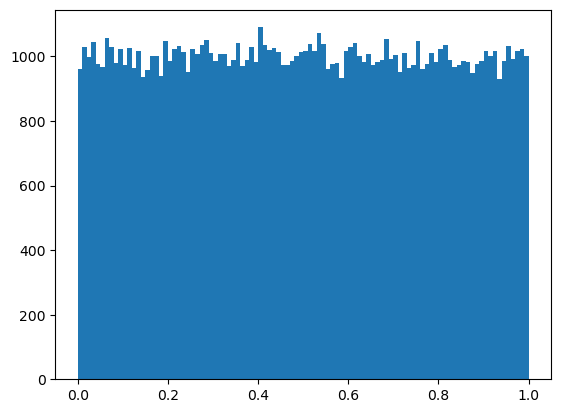

In [14]:
plot_mean_of_uniform(1)

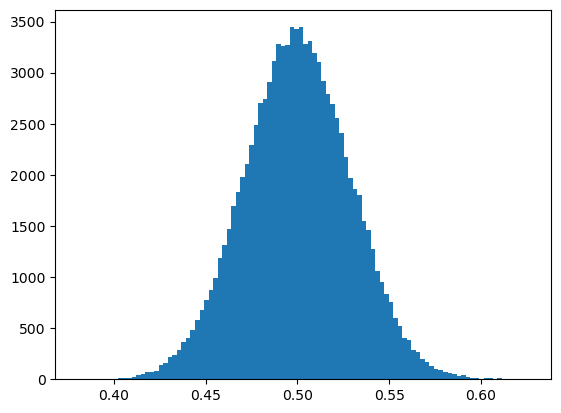

In [16]:
plot_mean_of_uniform(100)

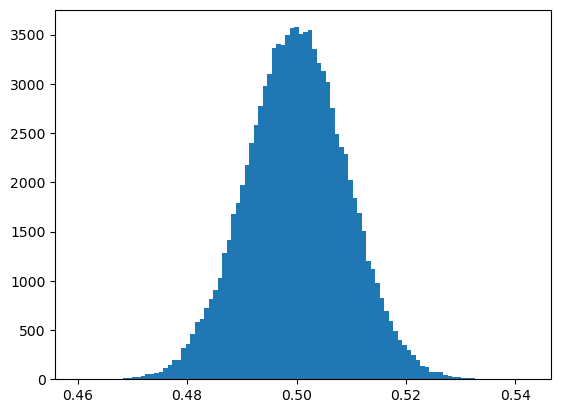

In [17]:
plot_mean_of_uniform(1000)

Switching to a more complicated distribution:

In [20]:
def plot_mean_of_bernoulli(sample_size):
    samples = (np.random.uniform(size=(100000, sample_size)) <0.01).mean(axis=1)
    plt.hist(samples, bins=100)

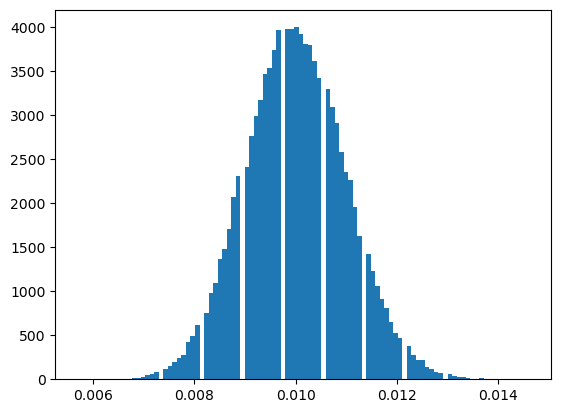

In [27]:
plot_mean_of_bernoulli(10000)

### Real-World Examples of the Central Limit Theorem
The central limit theorem is often cited as the reason why approximately normal distributions are so common in real life.

Test scores are a commonly cited example of normal distributions that can be explained by the central limit theorem. If you assume that each question on a test has its own probability of being answered correctly or incorrectly, then the central limit theorem suggests the distribution of test scores will look more and more normal as the number of questions increases. This model of question answering might be demoralizing and does not explain stronger students having consistently higher scores, but the overall distribution does appear normal. IQ scores also tend to be distributed normally, since they are usually calculated from test scores.

Growth of living organisms is often cited as another example. In this case, growth in a given period, say a month, day, or year, is the random variable being added, and the sums of that growth, the organisms' sizes, will have a distribution that appears normal. Such distributions have been observed for many animals, human heights, shoe sizes, and many more.

If that additive growth model does not make sense to you, since growth can be a multiplicative process, then consider the logarithm of the size instead; the logarithm of the size increase is the sum of the logarithms of the growths. Distributions whose logarithms follow normal distributions are called lognormal distributions, and they can be difficult to distinguish from normal distributions with small sample sizes.

### Limitations of the Central Limit Theorem

The main limitation of the central limit theorem is its speed of convergence. It is pretty well-known that convergence of the sample distribution is faster around the mean of the distribution. The edges of the distribution take longer to converge; this is a necessary part of the process since it takes longer to get tail samples from the extremes of the original distributions. It is a common mistake to assume that a hundred or a thousand samples is enough to treat the distribution as identical to a normal distribution. Similarly, it is common to assume that nothing changes if the original distribution becomes more or less skewed.

A more subtle issue is that the samples averaged together have independence requirements. The most basic form of the central limit theorem assumes independent and identically distributed variables being averaged. There exist versions of the central limit theorem for handling some dependencies, but only for specific kinds of dependencies. Be careful of assuming some version of the central limit theorem applies; even if such a version has been proven, it may impact the speed of convergence and increase the sample requirements.

### In summary...

Understanding the Central Limit Theorem (CLT) is crucial for making informed decisions in data analysis, especially in the context of online shopping. The CLT states that the sampling distribution of the sample mean approaches a normal distribution as the sample size increases, regardless of the shape of the population distribution. This concept has significant implications for analyzing data and making predictions about population parameters based on sample data.

### Key Takeaways:
- The CLT allows us to make inferences about population parameters, such as the population mean, based on sample data.
- It provides a basis for estimating confidence intervals and conducting hypothesis tests.
- The CLT is particularly useful in scenarios where the population distribution is unknown or non-normal, as it allows us to rely on the properties of the normal distribution for analysis.

In [4]:
### calculate an aproximate value of a finite limit unit using sampling
import numpy as np

# Define a large n value to approximate infinity
n = np.arange(1, 1000000, 1000)  # Range of large values of n

# Calculate the expression for each n
expression = (6 + 3*n) / n

# Output the last value in the array as n approaches infinity
limit_approx = expression[-1]
print("The approximate value of the limit is:", limit_approx)

The approximate value of the limit is: 3.000006005999994


In [2]:
#limit function
def f(x):
    return ((x + 3) * (x - 3)) / (x - 3)
#simulate the limit as x approaches 3
x_values = np.linspace(2.9, 3.1, 100)
y_values = f(x_values)

# Handling the indeterminate form at x = 3
x_values = x_values[x_values != 3]
y_values = y_values[np.isfinite(y_values)]

# Displaying a small sample of values near x = 3
print(x_values[:5], y_values[:5])

[2.9        2.9020202  2.9040404  2.90606061 2.90808081] [5.9        5.9020202  5.9040404  5.90606061 5.90808081]


## Topic Overview : Hypothesis Testing

We will now cover hypothesis testing, a family of statistical methods used to decide whether data supports a particular hypothesis. Modern hypothesis testing focuses on variants of the question “Could this data be explained by the null hypothesis or status quo, or is it unlikely enough that we should seek an alternate explanation?” Rigorous hypothesis testing brings together many of the tools we have seen so far—means and variance, the central limit theorem, and cumulative distribution functions are typically combined together. Rigorous hypothesis testing also requires more situational awareness; we will also cover how to interpret hypothesis tests in isolation vs. as part of a larger set of tests since there are many traps for the unwary.

### Learning Objectives
- Define hypothesis testing
- Explain the function of a p-value
- Explain any needed changes when checking many hypotheses

#### Think About It
- What kind of evidence do you need to decide to go against the status quo? 

### What is Hypothesis Testing?
Hypothesis testing seeks to reject hypotheses based on data. The most classic forms start with a null hypothesis representing default or business as usual assumptions. It is then argued that under the null hypothesis, the data that was collected was extremely unlikely to occur, so either the null hypothesis was wrong, or were very unlikely in our data collection. Subtleties abound in these arguments.

## Types of Errors and Successes
Let $\hat{Y}(x)$ denote any predictor mapping into {0,1}. Binary Predictions can be right or wrong in four different ways summarized by the *confusion table*.

### Confusion Table

| Confusion Table |  Y = 0          |  Y = 1          |
|-----------------|-----------------|-----------------|
| **Ŷ = 0**       | true negative   | false negative  |
| **Ŷ = 1**       | false positive  | true positive   |

Taking expected values over the populations gives us four corresponding rates that are characteristics of a predictor.

1. **True Positive Rate (TPR)**: 
   $$ TPR = \mathbb{P}[\hat{Y}(X) = 1 \mid Y = 1] $$  
   Also known as *power*, *sensitivity*, *probability of detection*, or *recall*.

2. **False Negative Rate (FNR)**: 
   $$ FNR = 1 - TPR $$  
   Also known as *type II error* or *probability of missed detection*.

3. **False Positive Rate (FPR)**: 
   $$ FPR = \mathbb{P}[\hat{Y}(X) = 1 \mid Y = 0] $$  
   Also known as *size* or *type I error* or *probability of false alarm*.

4. **True Negative Rate (TNR)**: 
   $$ TNR = 1 - FPR $$  
   The probability of declaring $\hat{Y} = 0$ given $Y = 0$. This is also known as *specificity*.

There are other quantities of interest in statistics and machine learning:

1. **Precision**: 
   $$ P[Y = 1 \mid \hat{Y}(X) = 1] $$  
   This is equal to:  
   $$ \frac{p_1 \cdot TPR}{p_0 \cdot FPR + p_1 \cdot TPR} $$

2. **F1-score**: 
   $$ F_1 $$ is the harmonic mean of precision and recall. We can write this as:
   $$ F_1 = \frac{2 \cdot TPR}{1 + TPR + \frac{p_0}{p_1} \cdot FPR} $$

3. **False Discovery Rate (FDR)**: 
   FDR is equal to the expected ratio of the number of false positives to the total number of positives.

In the case where both labels are equally likely, precision, $F_1$, and FDR are only functions of FPR and TPR. However, these quantities explicitly account for *class imbalances*: when there is a significant skew between $p_0$ and $p_1$, such measures are often preferred.

TPR and FPR are competing objectives. We’d like TPR as large as possible and FPR as small as possible.

We can think of risk minimization as optimizing a balance between TPR and FPR:
$$ R[\hat{Y}] := \mathbb{E}[loss(\hat{Y}(X), Y)] = \alpha \cdot FPR - \beta \cdot TPR + \gamma $$

where $\alpha$ and $\beta$ are nonnegative and $\gamma$ is some constant. For all such $\alpha$, $\beta$, and $\gamma$, the risk-minimizing predictor is an LRT.

Other cost functions might try to balance TPR versus FPR in other ways. Which pairs of (FPR, TPR) are achievable?

## 7.9 Lesson: Hypothesis Testing with P Values

Hypothesis Testing With P-Values
The most common kind of hypothesis testing in data science uses p-values estimating or bounding the probability of a result as extreme or more so than an observation if a null hypothesis is observed. The p-value is then compared to a target significance $\alpha$ , and if the p-value is below $\alpha$, then the null hypothesis is rejected. Not coincidentally, $\alpha$ is the false negative rate, or rate of Type I errors, if the p-value is calculated exactly. However, p-values are often approximated, so this connection is looser in practice.

Hypothesis Testing Using P-Values
This video introduces one-tailed significance tests and relates them to the cumulative distribution function of the null hypothesis.

### How to we methodically test these hypotheses?
Thought experiment:
1. Pick an appropriate sample statistic such as daily revenue or height.
2. Compute the distribution of that sample statistic under the null hypothesis.
3. Collect data, calculate the sample statistic $x$ and apply the cumulative distribution function to get $p = cdf(x)$.
    - We apply the cumulative distribution function to change the distribution to uniform random between 0 and 1. That is to say, we apply the CDF, assuming the null hypothesis, so that we get the uniform random distribution if the null hypothesis is true.  

If the null hypothesis is true, the last calulcated value $p$ will be a uniform random variable between 0 and 1.

### What if the Null Hypothesis is Wrong?
- If the null hypothesis is wrong
    - $p$ will not return a uniform random distribution
- If the real distribution is much greater than the null hypothesis,
    - $p$ will be biased towards 1
- If the real distribution is much lower than the null hypothesis, 
    - $p$ will be biased toward 0. 

How much? Depends on how far off the null hypothesis is... 

### What is the reality is way higher than the Null Hypothesis?
- What if $p$ in this thought experiment was always around .99999?
- What if we rejected the null hypothesis if $p$ was really close to 1?
- What if we rejected the null hypothesis if $p$ >= 1-x?

### Hypothesis Testing with One-Sided P-Values (Greater)

If you really believe that the samples will be greater than predicted by the null hypothesis.
1. Calculate the CDF of the sample statistic under the null hypothesis.
2. Calculate the sample statistic $x$.
3. Calculate $p=cdf(x)$ **(this changed from the thought experiment)**
4. Reject the null hypothesis if $p<\alpha$. 

The difference form the thought experiement is that $p$ is reversed now. So now $p$ is the probability that the sample statistic is greater than or equal to $x$. 

Why switch it? Because we are looking to say that the greater values are more likely now, but were unlikely with the null hypothesis.


### Hypothesis Testing with One-Sided P-Values (Lower)

If you believe that the samples will be lower than predicted by the null hypothesis, the algorithm is the same except that we do not reverse $p$, so it is the probability of being lower than the observed $x$.
1. Calculate the CDF of the sample statistic under the null hypothesis.
2. Calculate the sample statistic $x$.
3. Calculate $p=cdf(x)$ **(Not reversed now)**
4. Reject the null hypothesis if $p<\alpha$.

## Definitions
### Definition: P-Value

The p-value of a sample $x$ is the probability under the null hypothesis of another sample that is more extreme than $x$.

The variable $p$ in the previous two algorithms was the p-value.

### Hypothesis Testing Using Z-Scores
This video explains how to test hypotheses using a measure called z-scores. This is a shortcut that can be used if the null hypothesis has a normal distribution or if we are willing to assume that the distribution is close enough. (The central limit theorem often makes us confident enough.)

The z value is basically the number of standard deviations above the mean predicted by the null hypothesis, comparing Z against a quartile of the standard normal distribution, instead of comparing probabilities. How does that work?


### How do Z-Tests work? 
1. calculate $z = \frac{x-\mu}{\sigma}$
2. If the null hypothesis holds, then $z$ has distribution $\mathcal{N}(0,1)$
3. Reject if $1-cdf(z) < \alpha$ (p-value test)
4. Reject if $1-\alpha < cdf(z)$
5. Reject if quantile $_{1-\alpha}(\mathcal{N}(0,1)) < \mathcal{z}$
6. Reject if $\mathcal{z} >$ quantile$_{1-\alpha}(\mathcal{N}(0,1))$

The righthand side of the comparison only depends on $\alpha$, and tables have been made of these thresholds for common $\alpha$.

### Z-Test Thresholds

Reject if $\mathcal{z} >$ quantile$_{1-\alpha}(\mathcal{N}(0,1))$

The righthand side of the only depends on $\alpha$, and tables have been made of these thresholds for common $\alpha$.

| $\alpha$ | z-threshold |
| :--- | :--- |
| 0.2 | 1.28 |
| 0.10 | 1.64 |
| 0.05 | 1.96 |
| 0.02 | 2.33 |
| 0.01 | 2.58 |

## 7.10 Lesson: Multiple Comparisons Problem

### Multiple Comparisons Problem
One of the common problems with using p-values is that they assume that only one hypothesis is being checked. While the analysis still works for any particular hypothesis test, if you repeatedly run hypothesis tests, the probability of at least one false negative approaches one, and the expected number of false negatives grows linearly with the number of hypothesis tests. The most common solution proposed is to compensate for decreasing $\alpha$ based on the number of tests.

### A Humorous Example of Hypothesis Testing Gone Wrong
The following comic has a humorous take on the misuse of repeated hypothesis testing. Unfortunately, variations of this do happen quite often in both academia and industry, sometimes with the number of hypotheses tested much larger than $\frac{1}{\alpha}$, implying more than one expected false positive. One of the dangers of working with big data is having too many potential hypotheses and disregarding the predictable number of false positives due to random chance.



## 7.11 Lesson: Many Kinds of Statistical Tests

There are many kinds of statistical tests for different situations. Most of them work with p-values or an approximation of them, but they are specialized to cover circumstances not covered so far. In particular, these include non-normal distributions and small sample sizes where the central limit theorem does not apply. We will briefly cover a few other common statistical tests.

## Student’s One-Sided t-Test

Student’s one-sided _t_-test was developed to test whether a population has an assumed mean, based on a sample from the population. This test was developed by William Gosset while working at the Guinness Brewery. He published under the pseudonym Student because the brewery did not want their competitors to realize that Guinness was using statistical tests to monitor their beer quality. For these tests, they would compare samples from a new batch of beer vs. their existing quality standard to see if the new batch was significantly different.

Given an assumed population (batches of beer) mean $\mu$, and a sample $x$ of size $n$, then the test statistic is computed as:

$$
t = \frac{\text{mean}(x) - \mu}{\sigma(x) / \sqrt{n}}
$$

Using the central limit theorem with the usual assumptions about independent samples and variance, the distribution of _t_ is approximately the standard normal distribution, so it can be evaluated as a z-score.

A related two-sided _t_-test was also developed to compare whether two samples came from populations with the same mean. This test was used to compare ingredients from different suppliers.

## Permutation Tests

Permutation tests are a simple test looking at a sample divided into two categories and asking if the two categories have different distributions. The basic premise is as follows—if the category labels and the sample measure are independent, then the category labels can be swapped arbitrarily as long as the number of rows with each category is preserved.

Picking a uniform random permutation of the labels will then generate a sample that is equally likely under the hypothesis that the labels and measures are independent. We can sample that distribution easily, since we are just rearranging the labels. What can we do with it?

Let’s call the two categories A and B. A statistic $p$ that we can calculate is the difference between the average measure of A and the average measure of B. Our null hypothesis is that the category labels are independent of the sample measures. We can sample the distribution of that statistic under this null hypothesis by picking random label permutations. And we can get as many samples as we like to get high confidence in our sample distribution of that statistic.

How do we test the null hypothesis? We calculate the statistic for A and B as they are in the actual sample and check their quantile against the sample distribution under the null hypothesis. We can then run a one- or two-sided p-value test depending on whether we started with a hypothesis of whether A or B had a higher mean measure.

## Many, Many Statistical Tests

As of May 2024, Wikipedia has articles on 28 different statistical tests and asserts that more than 100 have been published.

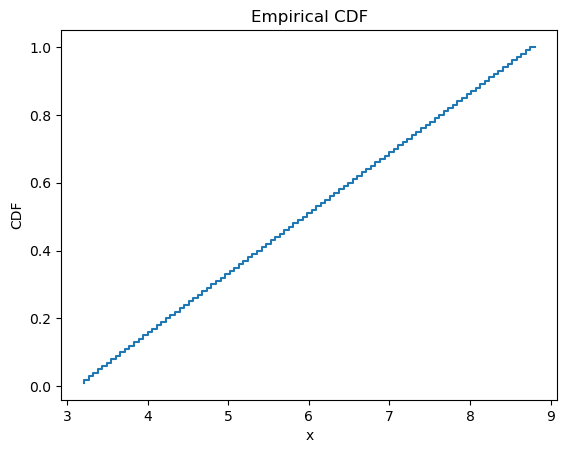

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Sort the data
    sorted_data = np.sort(data)

    # Create an array of x-values for the ECDF plot
    x = np.linspace(min(data), max(data), len(data))

    # Calculate the cumulative probability for each x-value
    y = np.arange(1, len(data) + 1) / len(data)

    return x, y

# Sample data
data = np.array([6.56062922, 8.05149003, 4.24825307, 5.89800431, 4.12968898,
       6.16117527, 5.38907131, 5.41404083, 6.3995269 , 6.78634137,
       6.22796981, 4.55988226, 4.9809148 , 5.91523237, 4.91523075,
       7.3028712 , 6.87122171, 4.52565906, 5.76434526, 5.31604651,
       7.25063809, 4.24643004, 6.52987363, 6.05757534, 6.82386797,
       7.48022126, 5.87533487, 7.02742514, 7.20382545, 5.82672641,
       6.71389979, 5.11077349, 7.67843799, 5.66464224, 5.7092994 ,
       3.2572212 , 5.78109917, 5.39459858, 6.60992302, 5.93070358,
       7.10773652, 5.64892364, 3.68849504, 4.8451847 , 6.01534183,
       4.38000276, 7.41563945, 6.89014792, 7.77834674, 5.5368395 ,
       5.38465388, 4.73294996, 5.58649916, 5.99128937, 6.38058961,
       6.70626205, 5.59526173, 4.36179211, 3.62537513, 5.78922944,
       5.79315919, 7.23886723, 5.1127356 , 3.5490225 , 5.80299017,
       7.76573873, 3.21114127, 3.41482157, 8.80317566, 5.17321002,
       4.46293046, 4.81839111, 4.79710526, 5.9317453 , 5.08618734,
       5.8507972 , 7.30433857, 4.26087762, 5.50748049, 5.31339463,
       4.33992787, 6.44657891, 6.29622774, 4.81904013, 6.65312179,
       7.4858895 , 4.54967638, 4.70464419, 5.29373718, 6.83796865,
       6.39806464, 8.06565846, 7.36787739, 7.0795772 , 5.98787754,
       6.40424913, 6.3692323 , 6.6040807 , 5.7100411 , 5.09037487])

# Calculate ECDF
x, y = ecdf(data)

# Plot the ECDF
plt.step(x, y)
plt.xlabel('x')
plt.ylabel('CDF')
plt.title('Empirical CDF')
plt.show()